<a href="https://colab.research.google.com/github/cantaruttim/Rotinas/blob/main/Distribui%C3%A7%C3%A3o_de_frequ%C3%AAncia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Distribuição de frequência

## Importação das bibliotecas e dados originais

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

## Ordenação

In [3]:
dados = np.sort(dados)

In [4]:
dados

array([150, 151, 152, 152, 153, 154, 155, 155, 155, 155, 156, 156, 156,
       157, 158, 158, 160, 160, 160, 160, 160, 161, 161, 161, 161, 162,
       163, 163, 164, 164, 164, 165, 166, 167, 168, 168, 169, 170, 172,
       173])

In [5]:
minimo = dados.min()
minimo

150

In [6]:
maximo = dados.max()
maximo

173

In [7]:
np.unique(dados, return_counts=True)

(array([150, 151, 152, 153, 154, 155, 156, 157, 158, 160, 161, 162, 163,
        164, 165, 166, 167, 168, 169, 170, 172, 173]),
 array([1, 1, 2, 1, 1, 4, 3, 1, 2, 5, 4, 1, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1]))

<BarContainer object of 40 artists>

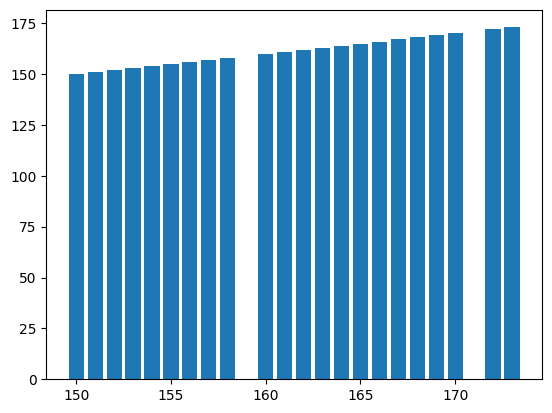

In [8]:
plt.bar(dados, dados)

## Número de classes

- i = 1 + 3.3 log n

In [9]:
n = len(dados)
n

40

In [10]:
i = 1 + 3.3 * np.log10(n)
i

6.286797971382276

In [11]:
i = round(i)
i

6

## Amplitude do intervalo

- h = AA / i
- AA = Xmax - Xmin

In [12]:
AA = maximo - minimo
AA

23

In [13]:
h = AA / i
h

3.8333333333333335

In [14]:
import math
h = math.ceil(h)
h

4

## Construção da distribuição de frequência

In [15]:
intervalos = np.arange(minimo, maximo + 2, step = h)
intervalos

array([150, 154, 158, 162, 166, 170, 174])

In [16]:
intervalo1, intervalo2, intervalo3, intervalo4, intervalo5, intervalo6 = 0,0,0,0,0,0
for i in range(n):
  if dados[i] >= intervalos[0] and dados[i] < intervalos[1]:
    intervalo1 += 1
  elif dados[i] >= intervalos[1] and dados[i] < intervalos[2]:
    intervalo2 += 1
  elif dados[i] >= intervalos[2] and dados[i] < intervalos[3]:
    intervalo3 += 1
  elif dados[i] >= intervalos[3] and dados[i] < intervalos[4]:
    intervalo4 += 1
  elif dados[i] >= intervalos[4] and dados[i] < intervalos[5]:
    intervalo5 += 1
  elif dados[i] >= intervalos[5] and dados[i] < intervalos[6]:
    intervalo6 += 1

In [17]:
lista_intervalos = []
lista_intervalos.append(intervalo1)
lista_intervalos.append(intervalo2)
lista_intervalos.append(intervalo3)
lista_intervalos.append(intervalo4)
lista_intervalos.append(intervalo5)
lista_intervalos.append(intervalo6)
lista_intervalos

[5, 9, 11, 7, 5, 3]

In [18]:
lista_classes = []
for i in range(len(lista_intervalos)):
  lista_classes.append(str(intervalos[i]) + '-' + str(intervalos[i + 1]))

In [19]:
lista_classes

['150-154', '154-158', '158-162', '162-166', '166-170', '170-174']

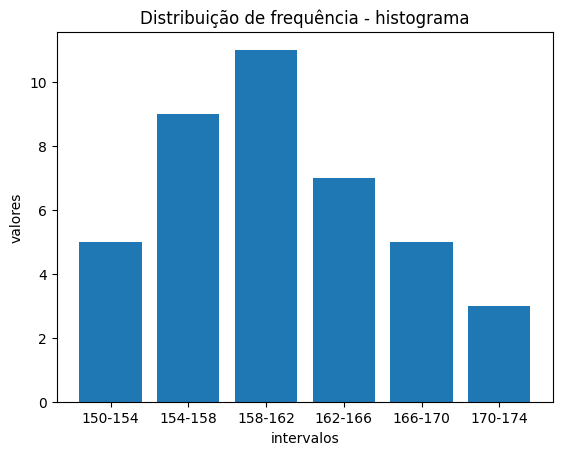

In [20]:
plt.bar(lista_classes, lista_intervalos)
plt.title('Distribuição de frequência - histograma')
plt.xlabel('intervalos')
plt.ylabel('valores');

## Distribuição de frequência e histograma com numpy e matplotlib

- https://numpy.org/doc/stable/reference/generated/numpy.histogram.html
- https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges

In [21]:
dados = np.array([160, 165, 167, 164, 160, 166, 160, 161, 150, 152, 173, 160, 155,
                  164, 168, 162, 161, 168, 163, 156, 155, 169, 151, 170, 164,
                  155, 152, 163, 160, 155, 157, 156, 158, 158, 161, 154, 161, 156, 172, 153])

In [22]:
frequencia, classes = np.histogram(dados)

In [23]:
frequencia, classes, len(classes)

(array([4, 2, 7, 3, 9, 3, 5, 3, 2, 2]),
 array([150. , 152.3, 154.6, 156.9, 159.2, 161.5, 163.8, 166.1, 168.4,
        170.7, 173. ]),
 11)

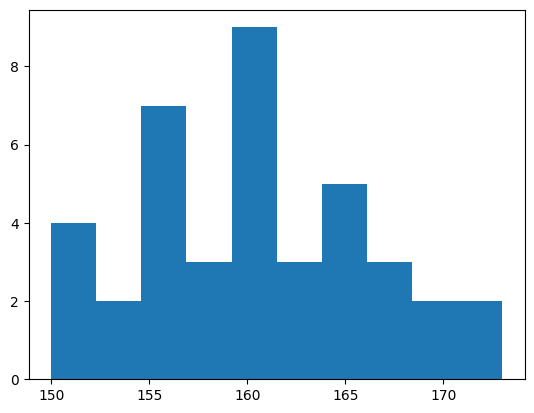

In [24]:
plt.hist(dados, bins = classes);

In [25]:
frequencia, classes = np.histogram(dados, bins=5)
frequencia, classes

(array([ 6, 10, 12,  8,  4]),
 array([150. , 154.6, 159.2, 163.8, 168.4, 173. ]))

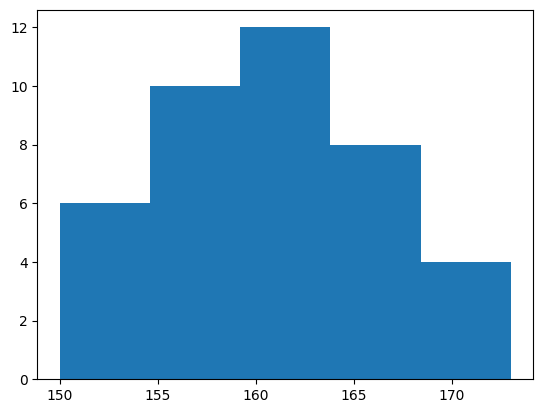

In [26]:
plt.hist(dados, classes);

In [27]:
frequencia, classes = np.histogram(dados, bins = 'sturges')
frequencia, classes

(array([ 5,  8,  3, 12,  5,  4,  3]),
 array([150.        , 153.28571429, 156.57142857, 159.85714286,
        163.14285714, 166.42857143, 169.71428571, 173.        ]))

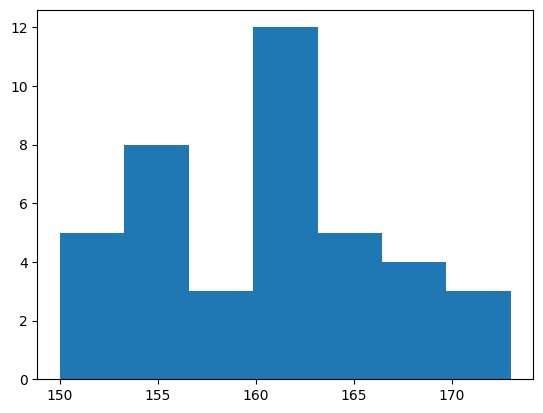

In [28]:
plt.hist(dados, classes);

## Distribuição de frequência e histograma com pandas e seaborn

In [29]:
type(dados)

numpy.ndarray

In [30]:
dataset = pd.DataFrame({'dados': dados})

In [31]:
dataset.head()

,dados
0,160
1,165
2,167
3,164
4,160


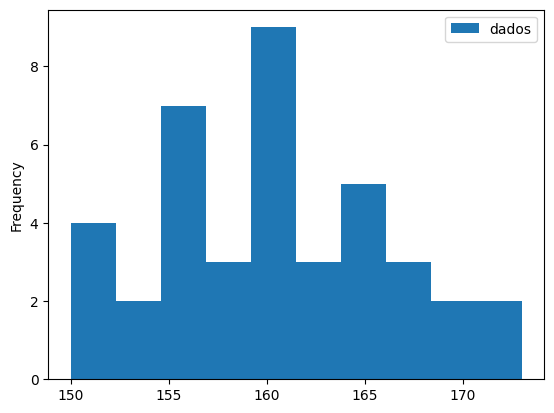

In [32]:
dataset.plot.hist();

<ipython-input-33-74f775a4c138>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados, hist = True, kde = True);


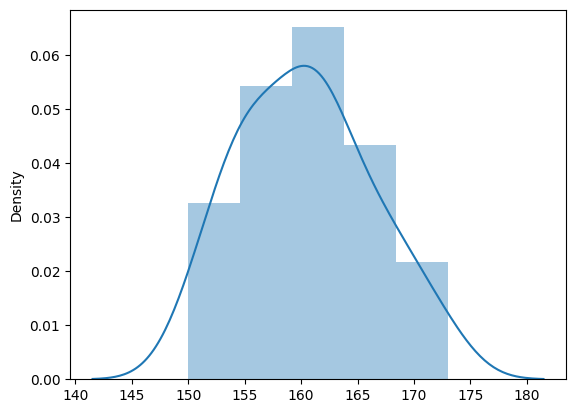

In [33]:
sns.distplot(dados, hist = True, kde = True);

## Exercício - idade census.csv

In [ ]:
import pandas as pd
dataset = pd.read_csv('census.csv')

In [ ]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dataset['age'].max(), dataset['age'].min()

(90, 17)

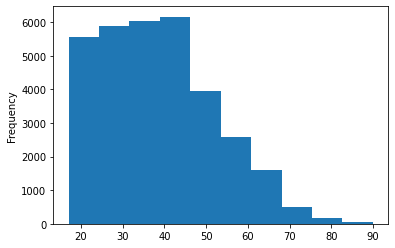

In [ ]:
dataset['age'].plot.hist();

In [ ]:
dataset['age'] = pd.cut(dataset['age'], bins=[0, 17, 25, 40, 60, 90],
                        labels=['Faixa1', "Faixa2", "Faixa3", "Faixa4", "Faixa5"])

In [ ]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dataset['age'].unique()

[Faixa3, Faixa4, Faixa2, Faixa5, Faixa1]
Categories (5, object): [Faixa1 < Faixa2 < Faixa3 < Faixa4 < Faixa5]

## Regras de associação

In [ ]:
dataset.head()

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,Faixa3,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,Faixa4,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,Faixa3,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,Faixa4,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,Faixa3,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
dataset_apriori = dataset[['age', 'workclass', 'education', 'marital-status', 'relationship', 'occupation',
                            'sex', 'native-country', 'income']]

In [ ]:
dataset_apriori.head()

,age,workclass,education,marital-status,relationship,occupation,sex,native-country,income
0,Faixa3,State-gov,Bachelors,Never-married,Not-in-family,Adm-clerical,Male,United-States,<=50K
1,Faixa4,Self-emp-not-inc,Bachelors,Married-civ-spouse,Husband,Exec-managerial,Male,United-States,<=50K
2,Faixa3,Private,HS-grad,Divorced,Not-in-family,Handlers-cleaners,Male,United-States,<=50K
3,Faixa4,Private,11th,Married-civ-spouse,Husband,Handlers-cleaners,Male,United-States,<=50K
4,Faixa3,Private,Bachelors,Married-civ-spouse,Wife,Prof-specialty,Female,Cuba,<=50K


In [ ]:
dataset.shape

(32561, 15)

In [ ]:
dataset_apriori = dataset_apriori.sample(n = 1000)
dataset_apriori.shape

(1000, 9)

In [ ]:
transacoes = []
for i in range(dataset_apriori.shape[0]):
  transacoes.append([str(dataset_apriori.values[i, j]) for j in range(dataset_apriori.shape[1])])

In [ ]:
len(transacoes)

1000

In [ ]:
transacoes[:2]

[['Faixa3',
  ' Private',
  ' HS-grad',
  ' Never-married',
  ' Not-in-family',
  ' Prof-specialty',
  ' Female',
  ' United-States',
  ' <=50K'],
 ['Faixa2',
  ' Self-emp-not-inc',
  ' 7th-8th',
  ' Married-civ-spouse',
  ' Husband',
  ' Transport-moving',
  ' Male',
  ' United-States',
  ' >50K']]

In [ ]:
!pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-cp36-none-any.whl size=5975 sha256=56a9d1b3e46804a3d91238858dba3f317d44bb9a4bcf7dda90aa19bcba4b6a18
  Stored in directory: /root/.cache/pip/wheels/5d/92/bb/474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [ ]:
from apyori import apriori

In [ ]:
regras = apriori(transacoes, min_support = 0.3, min_confidence = 0.2)
resultados = list(regras)

In [ ]:
len(resultados)

36

In [ ]:
resultados

[RelationRecord(items=frozenset({' <=50K'}), support=0.763, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K'}), confidence=0.763, lift=1.0)]),
 RelationRecord(items=frozenset({' Female'}), support=0.341, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Female'}), confidence=0.341, lift=1.0)]),
 RelationRecord(items=frozenset({' HS-grad'}), support=0.31, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' HS-grad'}), confidence=0.31, lift=1.0)]),
 RelationRecord(items=frozenset({' Husband'}), support=0.385, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Husband'}), confidence=0.385, lift=1.0)]),
 RelationRecord(items=frozenset({' Male'}), support=0.659, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' Male'}), confidence=0.659, lift=1.0)]),
 RelationRecord(items=frozenset({' Married-civ-spouse'}), support=0.4

In [ ]:
resultados[12]

RelationRecord(items=frozenset({' <=50K', ' Male'}), support=0.456, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({' <=50K', ' Male'}), confidence=0.456, lift=1.0), OrderedStatistic(items_base=frozenset({' <=50K'}), items_add=frozenset({' Male'}), confidence=0.5976408912188729, lift=0.9068905784808389), OrderedStatistic(items_base=frozenset({' Male'}), items_add=frozenset({' <=50K'}), confidence=0.6919575113808801, lift=0.906890578480839)])